Neighborhoods with higher high school graduation counts tend to be better places to live. The purpose of this notebook is to determine the neighborhoods with the highest amount of high school graduates and easily visualize the data.

In [64]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plot
education = pd.read_csv("education.csv", index_col="id")

Firstly the dataset should be sorted from lowest to highest high school graduation rate

In [65]:
hssort = education.sort_values(by='Edu. Attainment: High School Graduate (2010)')
print(hssort)

            Neighborhood  Sector # Population (2010)  \
id                                                     
1    Squirrel Hill North        10            11,363   
2              Shadyside        12            13,915   
3    Squirrel Hill South        10            15,110   
4          North Oakland        14            10,551   
5           Point Breeze        10             5,315   
..                   ...       ...               ...   
86  California-Kirkbride         3               761   
87                 Bluff        15             6,600   
88     Arlington Heights         7               244   
89         East Carnegie         4               570   
90               Chateau         3                11   

   Total Pop, 25 and older (2010)  \
id                                  
1                           6,207   
2                          10,234   
3                          11,137   
4                           3,050   
5                           4,322   
..          

Using this information we can see that East Carnegie has the highest percentage of high school graduates. In order to detrmine however if East Carnegie is best for education, we need to look at its other details. Lets check the college graduation amounts.

In [66]:
print(education.loc[[89]])

     Neighborhood  Sector # Population (2010) Total Pop, 25 and older (2010)  \
id                                                                             
89  East Carnegie         4               570                            204   

    Edu. Attainment: Less than High School (2010)  \
id                                                  
89                                          0.098   

    Edu. Attainment: High School Graduate (2010)  \
id                                                 
89                                         0.799   

    Edu. Attainment: Assoc./Prof. Degree (2010)  \
id                                                
89                                        0.049   

    Edu. Attainment: Bachelor's Degree (2010)  \
id                                              
89                                        0.0   

    Edu. Attainment: Postgraduate Degree (2010)  \
id                                                
89                                    

We can see here that although much of the population did complete high school, very little of them went on to earn a college degree. Looking at the data a second possible candiate for best education is the neighborhood West End. The data is visible below.

In [67]:
print(education.loc[[14]])

   Neighborhood  Sector # Population (2010) Total Pop, 25 and older (2010)  \
id                                                                           
14     West End         4               254                             86   

    Edu. Attainment: Less than High School (2010)  \
id                                                  
14                                          0.128   

    Edu. Attainment: High School Graduate (2010)  \
id                                                 
14                                          0.36   

    Edu. Attainment: Assoc./Prof. Degree (2010)  \
id                                                
14                                        0.244   

    Edu. Attainment: Bachelor's Degree (2010)  \
id                                              
14                                      0.267   

    Edu. Attainment: Postgraduate Degree (2010)  \
id                                                
14                                          

West End scores the highest in two year degrees and also scores respectably in other fields such as high school graduation rates and four year degrees. Now that we have two potential candiates for best education, lets compare their data.

In [68]:
echs = education.at[89,'Edu. Attainment: High School Graduate (2010)']
ecnhs = education.at[89,'Edu. Attainment: Less than High School (2010)']
ectwo = education.at[89,'Edu. Attainment: Assoc./Prof. Degree (2010)']
ecfour = education.at[89,'Edu. Attainment: Bachelor\'s Degree (2010)']
ecpost = education.at[89,'Edu. Attainment: Postgraduate Degree (2010)']
ecedu = [ecnhs, echs, ectwo, ecfour, ecpost]
print(ecedu)

wehs = education.at[14, 'Edu. Attainment: High School Graduate (2010)']
wenhs = education.at[14, 'Edu. Attainment: Less than High School (2010)']
wetwo = education.at[14, 'Edu. Attainment: Assoc./Prof. Degree (2010)']
wefour = education.at[14, 'Edu. Attainment: Bachelor\'s Degree (2010)']
wepost = education.at[14, 'Edu. Attainment: Postgraduate Degree (2010)']
weedu = [wenhs, wehs, wetwo, wefour, wepost]
print(weedu)

[0.098, 0.799, 0.049, 0.0, 0.054]
[0.128, 0.36, 0.244, 0.267, 0.0]


Now lets create a new dataframe with the data that is important

In [69]:
columns = ["Less than High School", "High School", "Two years of college", "Four years of college", "Graduate Degree"]
rows = ["East Carnegie", "West End"]
data = np.array([[ecedu[0], ecedu[1], ecedu[2], ecedu[3], ecedu[4]], [weedu[0], weedu[1], weedu[2], weedu[3], weedu[4]]])
df = pd.DataFrame(data=data, index=rows, columns=columns)
print(df)

               Less than High School  High School  Two years of college  \
East Carnegie                  0.098        0.799                 0.049   
West End                       0.128        0.360                 0.244   

               Four years of college  Graduate Degree  
East Carnegie                  0.000            0.054  
West End                       0.267            0.000  


To better visualize this we can plot each neighborhood's data in a pie chart

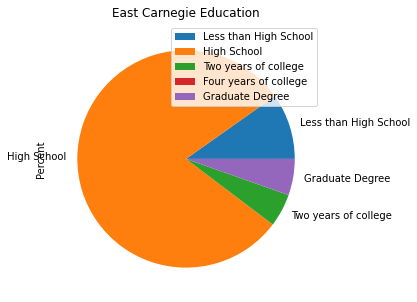

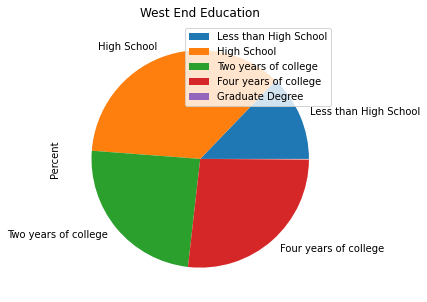

In [70]:
ecpie = pd.DataFrame({'Percent': [ecedu[0], ecedu[1], ecedu[2], ecedu[3], ecedu[4]]},
                  index=["Less than High School", "High School", "Two years of college", "Four years of college", "Graduate Degree"])
plot = ecpie.plot.pie(y='Percent', figsize=(5, 5), title="East Carnegie Education")

wepie = pd.DataFrame({'Percent': [weedu[0], weedu[1], weedu[2], weedu[3], weedu[4]]},
                  index=["Less than High School", "High School", "Two years of college", "Four years of college", "Graduate Degree"])
plot = wepie.plot.pie(y='Percent', figsize=(5, 5), title='West End Education')

From this data we can gather that although West End has more diversity in its populations highest education, it still has a higher percentage of the population that did not complete high school making East Carnegie the best neighborhood in Pittsburgh for education